In [1]:
#Importing libraries
from datetime import timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the dataset
path = 'superstore.csv'
data = pd.read_csv(path)
data.shape
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
#Trying to understand the dataset
#This is a method that we can use to get general information about dataset(column's name, feature's type) and check if there is any missing information in our dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In the above result we could see that both order date and ship date are in object format and we need to convert it into datetime format as we require this in the future analysis.

In [4]:
#Here we changed the column's type "object" to datetime by using "datetime" module in pandas.
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [5]:
#It is a method we use to get statistical informations
data.describe(include=[object, np.number])

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9789.000000,9800,9800,9800,9800,9800,9800.000000
unique,NaN,4922,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN
top,NaN,CA-2018-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN
mean,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059
std,2829.160653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.223413,NaN,NaN,NaN,NaN,NaN,626.651875
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,2450.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000
50%,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000
75%,7350.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000


In [6]:
#To get all the columns
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [7]:
#First will check if there are any duplicate values present
duplicate_rows = data.duplicated()
print(data[duplicate_rows])

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales]
Index: []


In [8]:
#Finding the missing values
print('Missing Values by Count: \n\n',
      data.isnull().sum().sort_values(ascending=True),'\n\nMissing Values by %:\n\n',
      data.isnull().sum().sort_values(ascending=True)/data.shape[0] * 100)

Missing Values by Count: 

 Row ID            0
Sub-Category      0
Category          0
Product ID        0
Region            0
State             0
City              0
Product Name      0
Country           0
Customer Name     0
Customer ID       0
Ship Mode         0
Ship Date         0
Order Date        0
Order ID          0
Segment           0
Sales             0
Postal Code      11
dtype: int64 

Missing Values by %:

 Row ID           0.000000
Sub-Category     0.000000
Category         0.000000
Product ID       0.000000
Region           0.000000
State            0.000000
City             0.000000
Product Name     0.000000
Country          0.000000
Customer Name    0.000000
Customer ID      0.000000
Ship Mode        0.000000
Ship Date        0.000000
Order Date       0.000000
Order ID         0.000000
Segment          0.000000
Sales            0.000000
Postal Code      0.112245
dtype: float64


So in the above result we could see there are missing values for Postal code, as it is a categorical value, we can replace it with Mode.

In [9]:
#Replacing with the missing values
postal_code_mode = data['Postal Code'].mode()[0]
data['Postal Code'].fillna(postal_code_mode, inplace=True)

In [10]:
#Just confirming if there are no missing values
print('Missing Values by Count: \n\n',
      data.isnull().sum().sort_values(ascending=True),'\n\nMissing Values by %:\n\n',
      data.isnull().sum().sort_values(ascending=True)/data.shape[0] * 100)

Missing Values by Count: 

 Row ID           0
Sub-Category     0
Category         0
Product ID       0
Region           0
Postal Code      0
State            0
City             0
Country          0
Segment          0
Customer Name    0
Customer ID      0
Ship Mode        0
Ship Date        0
Order Date       0
Order ID         0
Product Name     0
Sales            0
dtype: int64 

Missing Values by %:

 Row ID           0.0
Sub-Category     0.0
Category         0.0
Product ID       0.0
Region           0.0
Postal Code      0.0
State            0.0
City             0.0
Country          0.0
Segment          0.0
Customer Name    0.0
Customer ID      0.0
Ship Mode        0.0
Ship Date        0.0
Order Date       0.0
Order ID         0.0
Product Name     0.0
Sales            0.0
dtype: float64


In [11]:
#First lets explore more about the categorical values
#created categorical_columns list to observe the categorical columns.
categorical_columns = []
for i in data.columns:
    if data[i].dtypes == 'object':
        categorical_columns.append(i)

In [12]:
data[categorical_columns].describe()

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [13]:
#This method gives us to total information about each column's count
for column in categorical_columns:
  print(column)
  print(data[column].value_counts())
  print('END')
  print("")

Order ID
CA-2018-100111    14
CA-2018-157987    12
CA-2017-165330    11
US-2017-108504    11
CA-2017-105732    10
                  ..
US-2016-110261     1
CA-2016-125710     1
US-2016-137960     1
CA-2016-124975     1
CA-2016-142202     1
Name: Order ID, Length: 4922, dtype: int64
END

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64
END

Customer ID
WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
CK-12205    32
            ..
JR-15700     1
CJ-11875     1
SC-20845     1
RE-19405     1
AO-10810     1
Name: Customer ID, Length: 793, dtype: int64
END

Customer Name
William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Jocasta Rupert          1
Carl Jackson            1
Sung Chung              1
Ricardo Emerson         1
Anthony O'Donnell       1
Name: Customer Name, Length: 793, dtype: int64
E

We have our data ready now and we can proceed with data visualisation.

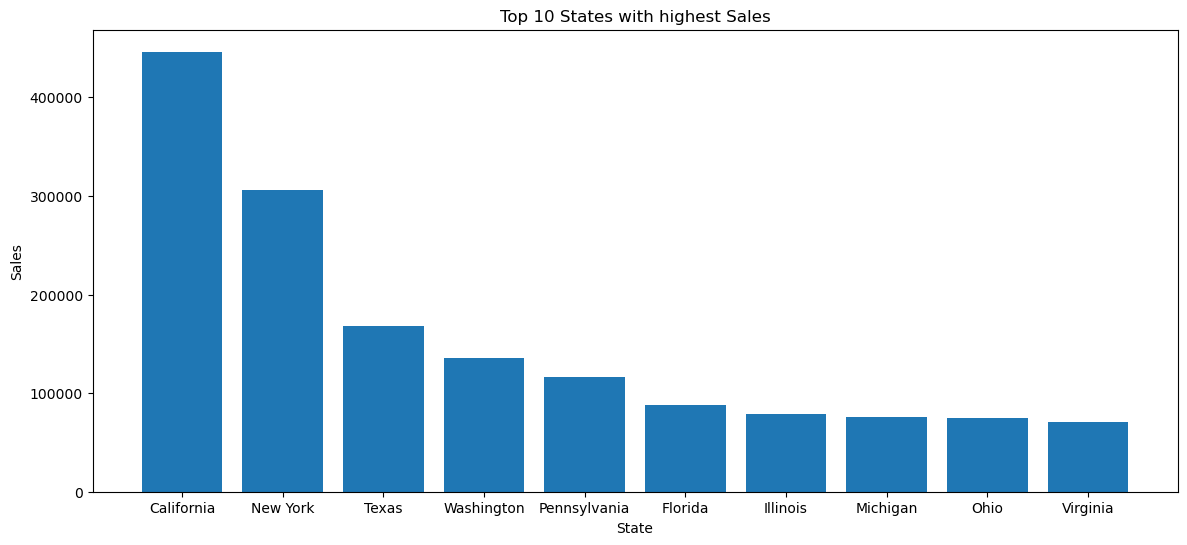

In [14]:
#Visualisation
#Plotting a bar graph for sales with top 10 states
import matplotlib.pyplot as plt

# Group the data by state and add the sales for each state
state_with_highest_sales = data.groupby('State')['Sales'].sum()

# Sort the data by sales in descending order
state_sales_after_sorting = state_with_highest_sales.sort_values(ascending=False)

# Select the top 10 states with the highest sales
top_10_states = state_sales_after_sorting[:10]

# Plot a bar chart of the sales for each state
plt.figure(figsize=(14,6))
plt.bar(top_10_states.index, top_10_states.values)
plt.title("Top 10 States with highest Sales")
plt.xlabel("State")
plt.ylabel("Sales")
plt.show()


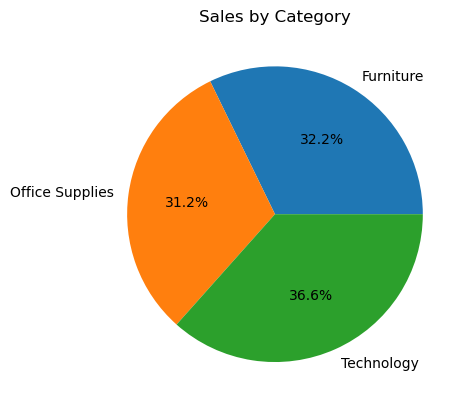

In [15]:
#pie chart of the sales with each category
# Group the data by category and sum the sales for each category
category_sales = data.groupby('Category')['Sales'].sum()

# Plot a pie chart of the sales for each category
plt.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%')
plt.title("Sales by Category")
plt.show()

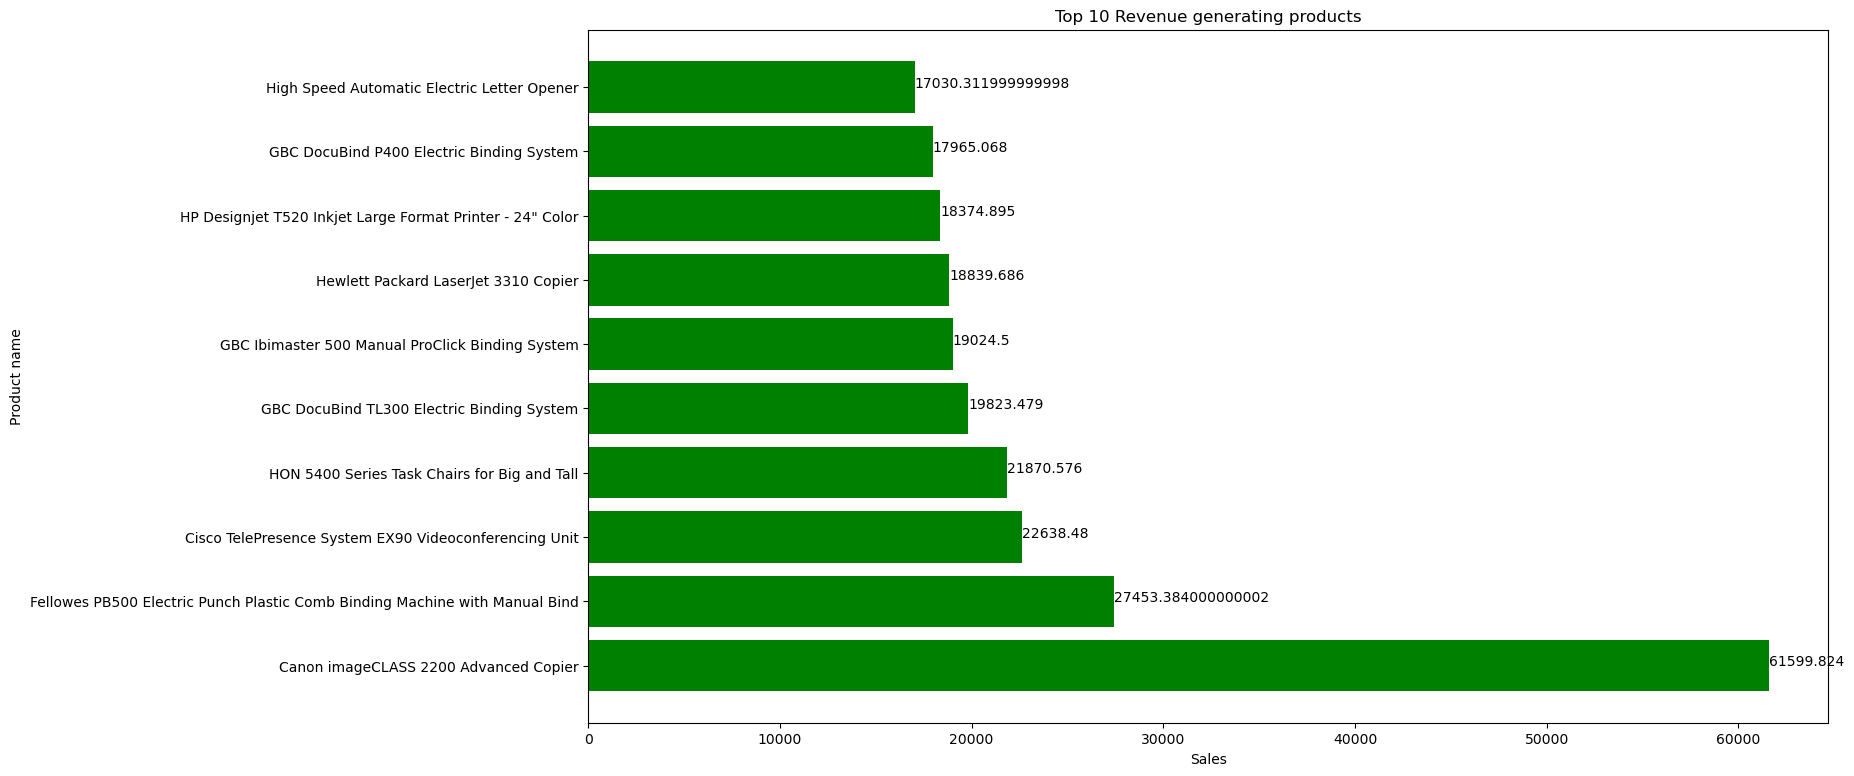

In [16]:
#Top 10 highest Revenue generating products
top_products=data[["Product Name","Sales"]]
top_products=top_products.sort_values(by="Sales",ascending=False)
top_products=top_products.groupby("Product Name").sum()
top_products=top_products.reset_index()
top_products=top_products.sort_values(by="Sales",ascending=False,ignore_index=True).head(10)
plt.figure(figsize=(16,9))
plt.barh(top_products["Product Name"],top_products["Sales"],color='green')
plt.title("Top 10 Revenue generating products")
plt.xlabel("Sales")
plt.ylabel("Product name")
for x,y in top_products["Sales"].items():
    plt.text(y,x,str(y))
plt.show()

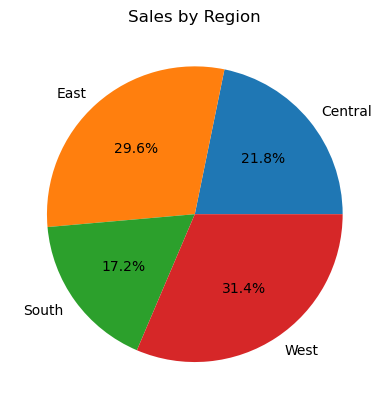

In [17]:
#Pie chart based on sales in each region
# Group the data by region and add the sales for each region
region_sales = data.groupby('Region')['Sales'].sum()

# Plot a pie chart of the sales for each region
plt.pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%')
plt.title("Sales by Region")
plt.show()


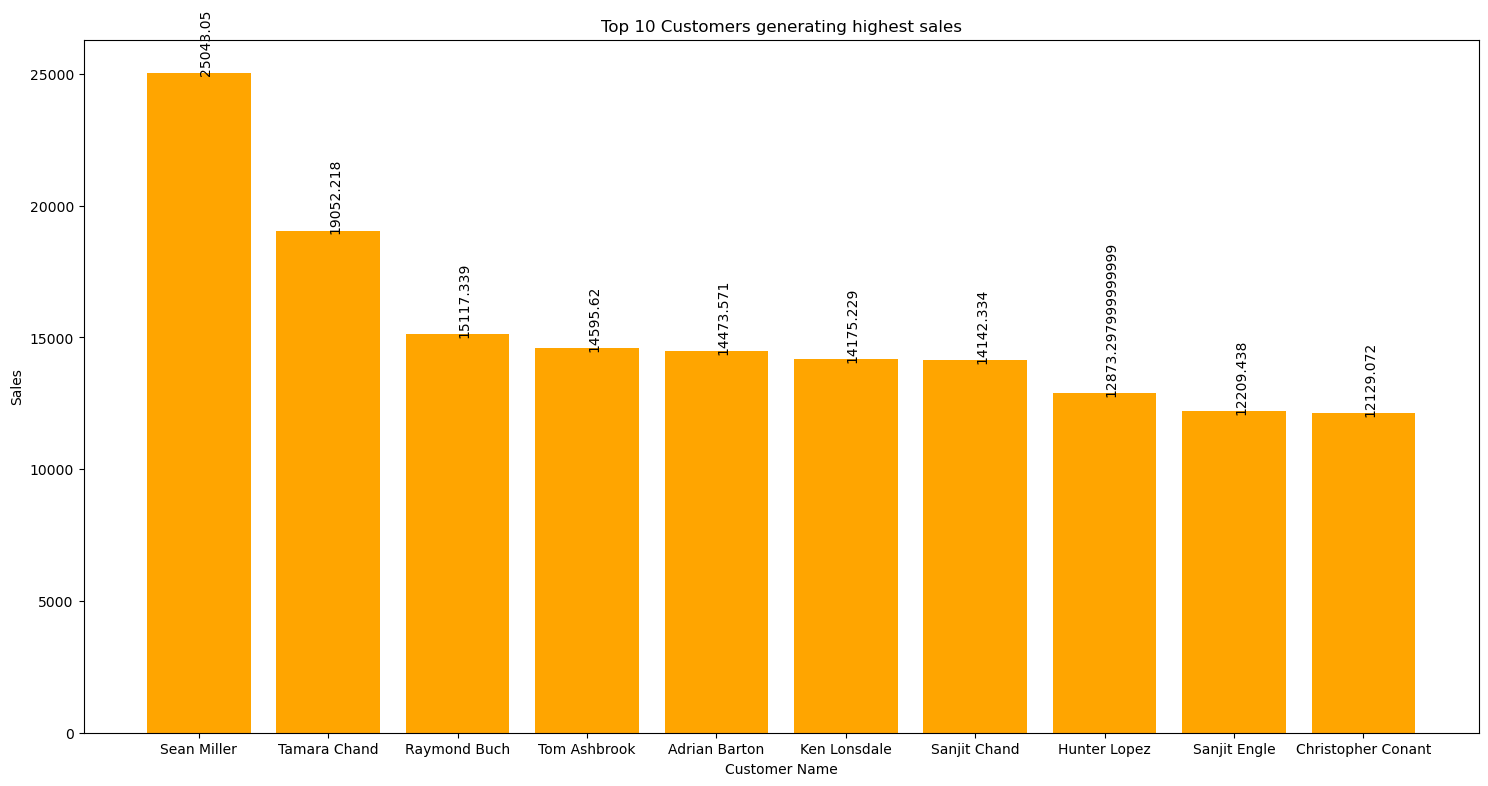

In [18]:
#Top 10 Customers
top_customer=data[["Customer Name","Sales"]]
top_customer=top_customer.sort_values(by="Sales",ascending=False)
top_customer=top_customer.groupby("Customer Name").sum()
top_customer=top_customer.reset_index()
top_customer=top_customer.sort_values(by="Sales",ascending=False,ignore_index=True).head(10)
plt.figure(figsize=(18,9))
plt.bar(top_customer["Customer Name"],top_customer["Sales"],color='orange')
plt.xlabel("Customer Name")
plt.ylabel("Sales")
plt.title("Top 10 Customers generating highest sales")
for x,y in top_customer["Sales"].items():
    plt.text(x,y,str(y),rotation=90)
plt.show()

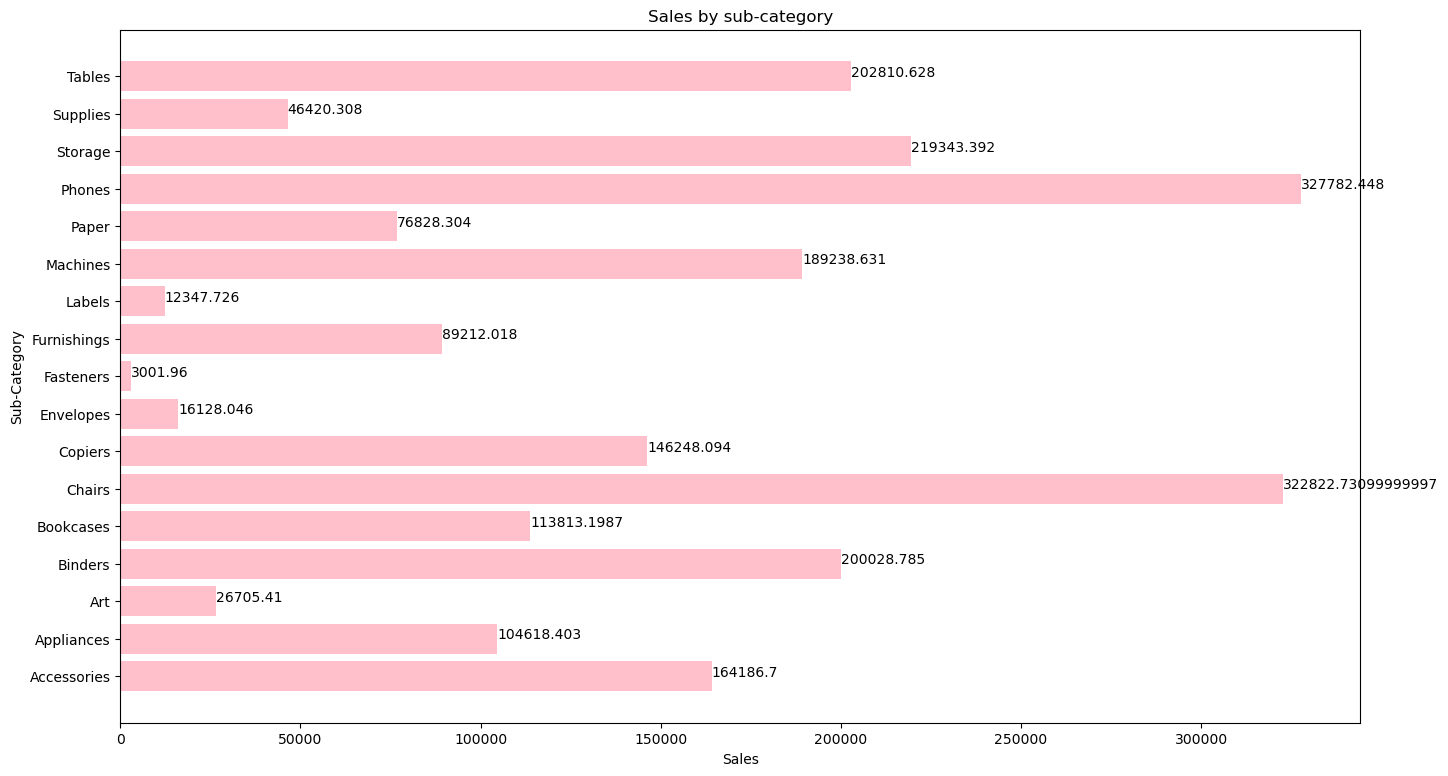

In [19]:
#Sales with respect to sub category
df_sub=data[["Sub-Category","Sales"]]
df_sub=df_sub.groupby("Sub-Category").sum()
df_sub=df_sub.reset_index()
plt.figure(figsize=(16,9))
plt.barh(df_sub["Sub-Category"],df_sub["Sales"],color='pink')
plt.title("Sales by sub-category")
plt.xlabel("Sales")
plt.ylabel("Sub-Category")
for x,y in df_sub["Sales"].items():
    plt.text(y,x,str(y))
plt.show()

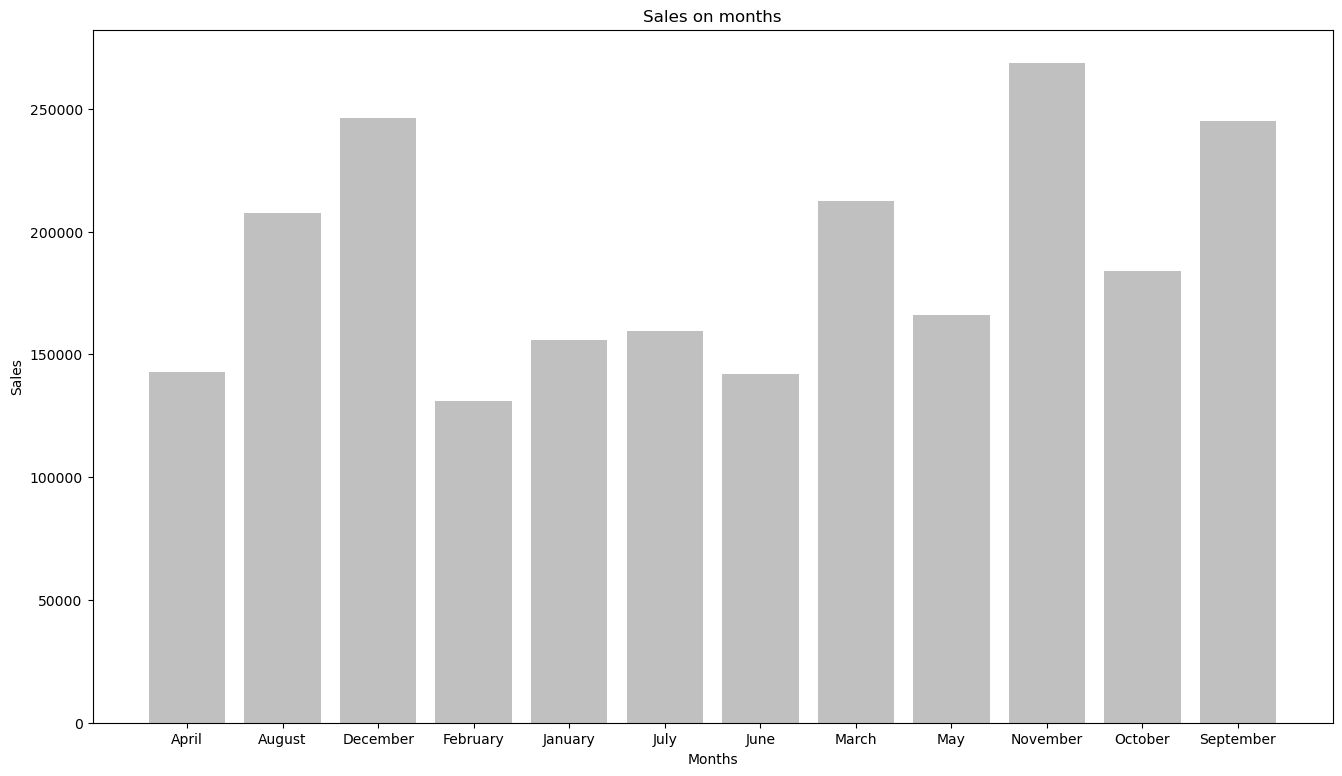

In [20]:
#Sales based on month
data["Month"]=data["Order Date"].dt.month_name()
df_mo=data[["Month","Sales"]]
df_mo=df_mo.groupby("Month").sum()
df_mo=df_mo.reset_index()
plt.figure(figsize=(16,9))
plt.bar(df_mo["Month"],df_mo['Sales'],color='silver')
plt.title('Sales on months')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

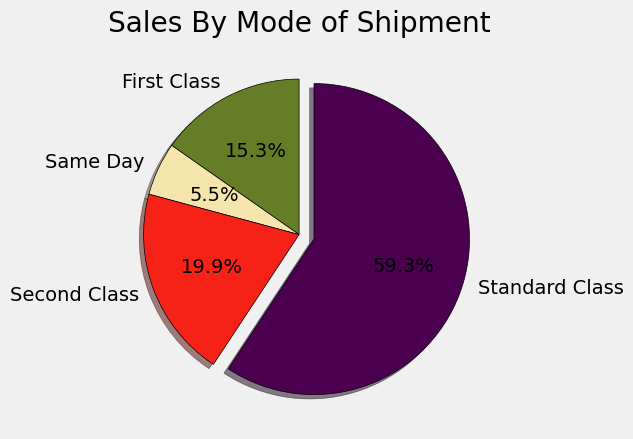

In [21]:
#Pie chart for sales against shipment mode
df_ship=data[["Ship Mode","Sales"]]
df_ship=df_ship.groupby("Ship Mode").sum()
df_ship=df_ship.reset_index()
plt.style.use('fivethirtyeight')
ship=df_ship["Ship Mode"].tolist()
plt.tight_layout()
plt.title("Sales By Mode of Shipment")
colors=["#667C26","#F3E5AB","#F62217","#4B0150"]
explode=[0,0,0,0.1]
plt.pie(df_ship["Sales"],labels=ship,colors=colors,wedgeprops={"edgecolor":"black"},shadow=True,explode=explode,
        startangle=90,autopct="%1.1f%%")
plt.show()

<AxesSubplot:xlabel='Category', ylabel='Month'>

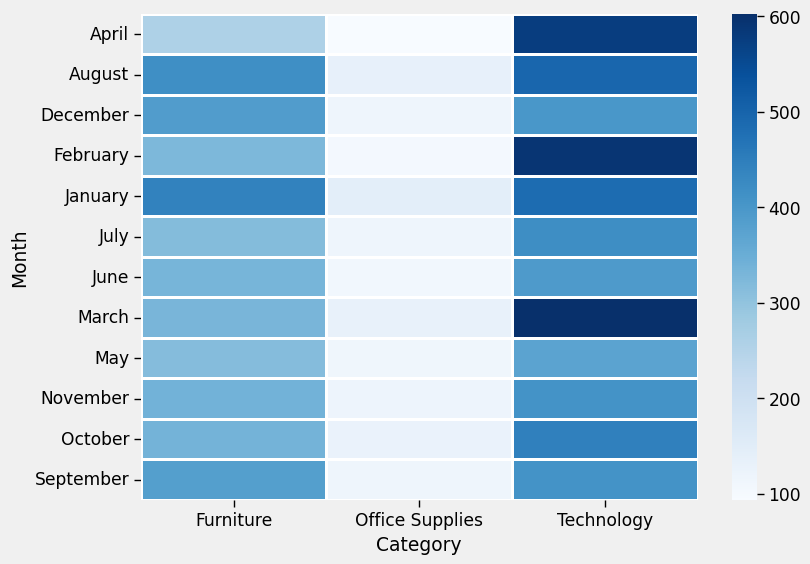

In [22]:
#Heatmap for Monthwise each category sold
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
data_mon=data[["Month","Sales","Category"]]
data_mon = data_mon.pivot_table(index='Month', columns='Category', values='Sales')
sns.heatmap(data_mon, cmap='Blues', linecolor='white', linewidth=1)

In [23]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,August
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,August
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,December
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,November
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,November


In [24]:
#Removing the unnecessary columns
data = data.drop(['Row ID', 'Order ID', 'Customer ID', 'Product Name','Customer Name','Month','Order Date','Ship Date','Country', 'City', 'State', 'Postal Code', 'Product ID'], axis=1)

In [25]:
data.head()

,Ship Mode,Segment,Region,Category,Sub-Category,Sales
0,Second Class,Consumer,South,Furniture,Bookcases,261.9600
1,Second Class,Consumer,South,Furniture,Chairs,731.9400
2,Second Class,Corporate,West,Office Supplies,Labels,14.6200
3,Standard Class,Consumer,South,Furniture,Tables,957.5775
4,Standard Class,Consumer,South,Office Supplies,Storage,22.3680


In [26]:
#We have categorical values such as Ship Mode, Segment, Category, and Sub-Category, we can transform them.
# Select the columns to keep
data = data[['Ship Mode', 'Segment','Region', 'Category', 'Sub-Category', 'Sales']]

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Ship Mode', 'Segment', 'Category', 'Sub-Category','Region'])

# Viewing the encoded dataframe
data_encoded.head()

,Sales,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,...,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Region_Central,Region_East,Region_South,Region_West
0,261.9600,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,731.9400,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,14.6200,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,957.5775,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,22.3680,0,0,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [27]:
data_encoded.columns

Index(['Sales', 'Ship Mode_First Class', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Ship Mode_Standard Class',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office',
       'Category_Furniture', 'Category_Office Supplies', 'Category_Technology',
       'Sub-Category_Accessories', 'Sub-Category_Appliances',
       'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases',
       'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes',
       'Sub-Category_Fasteners', 'Sub-Category_Furnishings',
       'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper',
       'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies',
       'Sub-Category_Tables', 'Region_Central', 'Region_East', 'Region_South',
       'Region_West'],
      dtype='object')

In [28]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = data_encoded.drop('Sales', axis=1)
y = data_encoded['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# View the shape of the training and testing sets
print('Training set size:', X_train.shape, y_train.shape)
print('Testing set size:', X_test.shape, y_test.shape)


Training set size: (7840, 31) (7840,)
Testing set size: (1960, 31) (1960,)


In [29]:
#Model Building
#Linear Regression
#importing important libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Creating the model object
Linear_model = LinearRegression()

#Fitting the model to the training data
Linear_model.fit(X_train, y_train)

#Predicting on the test data
y_prediction = Linear_model.predict(X_test)

#Evaluation metrices
rmse_lr = np.sqrt(mean_squared_error(y_test, y_prediction)) * 100 / np.mean(y_test)
mae_lr = mean_absolute_error(y_test, y_prediction) * 100 / np.mean(y_test)
aae_lr = mae_lr / (np.mean(y_test)) * 100
r2_lr = r2_score(y_test, y_prediction)

#printing the result
print('Root Mean Squared Error:', rmse_lr,)
print('Mean Absolute Error:', mae_lr,)
print('Average Absolute Error:', aae_lr,)
print('R-squared:', r2_lr,)


Root Mean Squared Error: 274.97763244078914
Mean Absolute Error: 88.7040041503683
Average Absolute Error: 32.92005931449326
R-squared: 0.17865871123041854


## Based on the metrics obtained in the linear regression model, we can derive the following insights.

RMSE (Root Mean Square Error) is a measure of the difference between predicted and actual values. An RMSE value of 274 indicates that predicted sales differ from actual sales by about $274 on average.

MAE (Mean Absolute Error) is another measure of the difference between predicted and actual values. The MAE value of 88 indicates that predicted sales differ from actual sales by an average of about $88.

AAE (Average Absolute Error) is the average of the absolute differences between the predicted and actual values. An AAE value of 32.56 indicates that the predicted retail price differs from the actual retail price by about $32.56 on average.

The R-squared value is a measure of how well the regression line fits the data points. An R-squared value of 0.18 indicates that only about 18% of the variability in the sales data can be explained by the independent variables used in the model.

In summary, due to the relatively high error metrics (RMSE, MAE, AAE) and relatively low R-squared values, the linear regression model may not be the best fit for this data. Other models may need to be explored to achieve better predictive accuracy. 

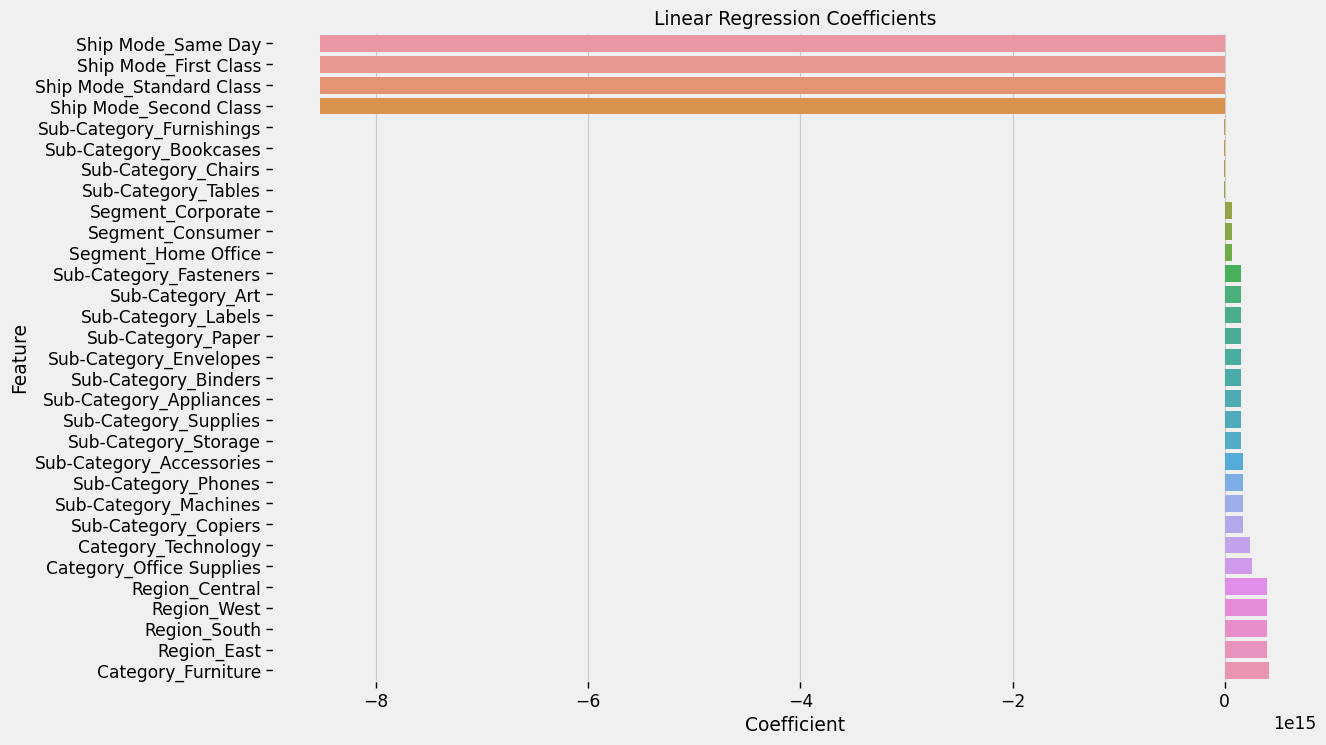

In [30]:
#horizontal bar plot showing the coefficients of each feature in the linear regression model
linear_regression_coefficients = pd.Series(Linear_model.coef_, X_train.columns).sort_values()
plt.figure(figsize=(12,8))
sns.barplot(x=linear_regression_coefficients, y=linear_regression_coefficients.index)
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [31]:
#Model building for decision tree
#importing the required libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix

# initializing and fitting the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# make predictions on the test set
y_predicted = decision_tree_model.predict(X_test)

#Evaluation metrices
rmse_dt = np.sqrt(mean_squared_error(y_test, y_predicted)) * 100 / np.mean(y_test)
mae_dt = mean_absolute_error(y_test, y_predicted) * 100 / np.mean(y_test)
aae_dt = mae_dt / (np.mean(y_test)) * 100
r2_dt = r2_score(y_test, y_predicted)

#printing the result
print('Root Mean Squared Error:', rmse_dt,)
print('Mean Absolute Error:', mae_dt,)
print('Average Absolute Error:', aae_dt,)
print('R-squared:', r2_dt,)


Root Mean Squared Error: 289.118118137411
Mean Absolute Error: 91.32964873767723
Average Absolute Error: 33.894495320859605
R-squared: 0.09201319899151716


Based on the RMSE, MAE, and AAE values, the model's prediction error is relatively high. An RMSE of 289.04 indicates that the average difference between the predicted and actual values ​​is about $289. This value is relatively high compared to the range of the target variable, indicating that the model's performance is not very accurate. Similarly, the MAE and AAE values ​​of 91.09 and 33.01 indicate that the mean absolute error and mean absolute percent error of the model's predictions are also relatively high.

The R-squared value of 0.092 indicates that only 9.2% of the variation in the target variable is explained by the model. This suggests that the model is not capturing underlying patterns in the data, and there may be other factors affecting sales that the model does not capture.

Overall, the model performance is unsatisfactory and may require further improvements to improve accuracy and predictive power. 

In [32]:
#importing required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

#creating a random forest regressor object
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model on the training data
random_forest_model.fit(X_train, y_train)

#making predictions on the test data
y_predicted = random_forest_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_prediction)) * 100 / np.mean(y_test)
mae_rf = mean_absolute_error(y_test, y_prediction) * 100 / np.mean(y_test)
aae_rf = mae_rf / (np.mean(y_test)) * 100
r2_rf = r2_score(y_test, y_prediction) 

print('Root Mean Squared Error:', rmse_rf,)
print('Mean Absolute Error:', mae_rf,)
print('Average Absolute Error:', aae_rf,)
print('R-squared:', r2_rf,)

Root Mean Squared Error: 274.97763244078914
Mean Absolute Error: 88.7040041503683
Average Absolute Error: 32.92005931449326
R-squared: 0.17865871123041854


The RMSE of the random forest regression model is 274.10. This means that the predicted sales values ​​differ on average by about $775. This is not as good as the linear regression model, but it is reasonable given the range of sales values.

His MAE value of 88.76 indicates that the average absolute error between predicted and actual sales values ​​is about $88. This means that the model can predict sales with reasonable accuracy.

AAE values is 32. This is to be expected as the model does not tend to overestimate or underestimate sales figures. An R-squared value of 0.17 indicates that only about 17% of the variance in sales can be explained by the predictors in the model. This indicates that other important factors may not be included in the model, or the model may not be complex enough to capture the relationship between predictor variables and sales values. 

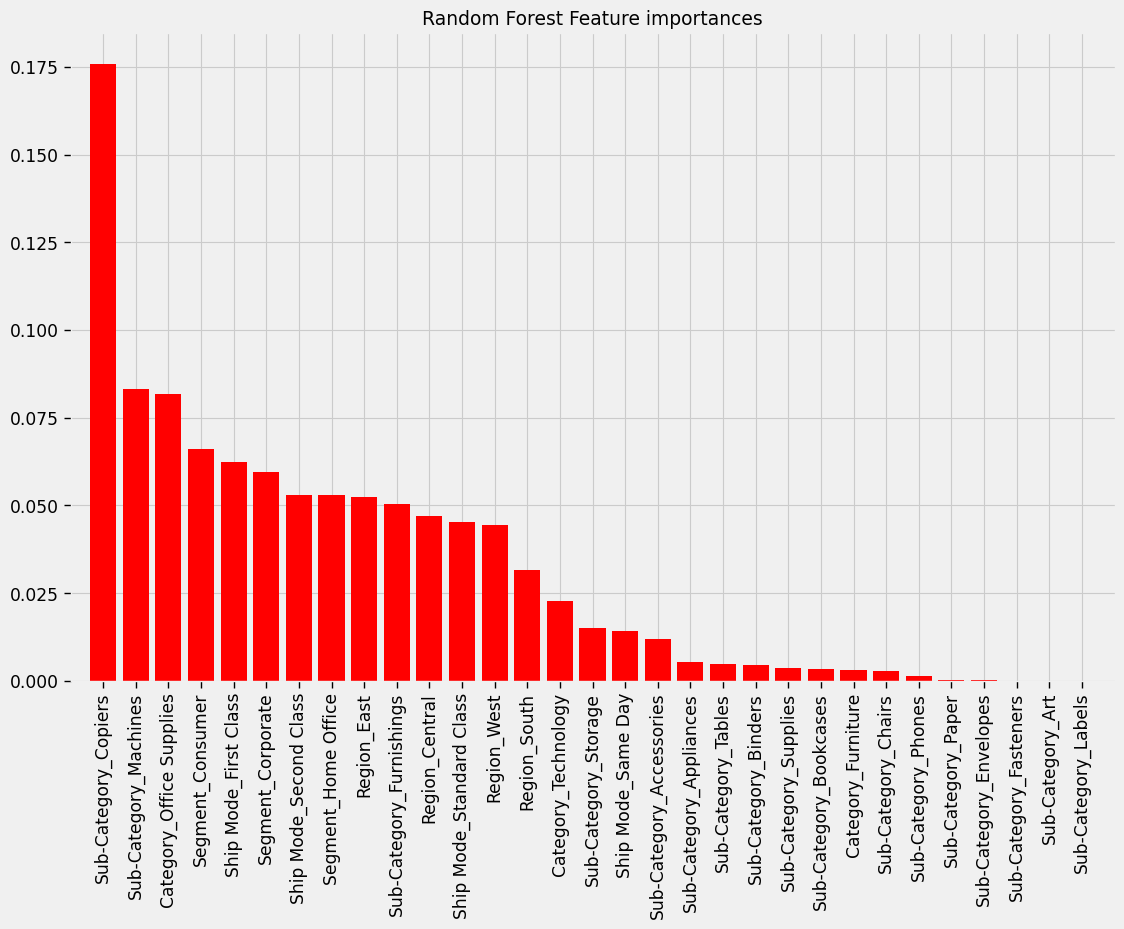

In [33]:
# Ploting feature importances
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,8))
plt.title("Random Forest Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


The code above produces a bar chart showing the feature weights of the random forest model. The x-axis represents different features and the y-axis represents the importance score. Features are sorted in descending order based on their importance value.

From the graph, we can see that the three most important characteristics are subcategory_Copiers, subcategory_machines, and subcategory_Office_suppliers. The Sub-Category_Furnishings, Category_Furniture, and Region_West features also have significant importance values. This information helps us to identify the features that have the greatest impact on our target variable (sales) and helps us to make decisions to improve our sales performance. 

In [34]:
#model building using ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Ridge regression model
ridge_model = Ridge(alpha=0.01, solver='cholesky')

# Fit model to training data
ridge_model.fit(X_train, y_train)

# Predict on test data
y_pred = ridge_model.predict(X_test)

rmse_rd = np.sqrt(mean_squared_error(y_test, y_predicted)) * 100 / np.mean(y_test)
mae_rd = mean_absolute_error(y_test, y_predicted) * 100 / np.mean(y_test)
aae_rd = mae_rd / (np.mean(y_test) + 1e-6) * 100
r2_rd = r2_score(y_test, y_predicted)

#printing the result
print('Root Mean Squared Error:', rmse_rd,)
print('Mean Absolute Error:', mae_rd,)
print('Average Absolute Error:', aae_rd,)
print('R-squared:', r2_rd,)

Root Mean Squared Error: 287.6600685010445
Mean Absolute Error: 91.2083685382271
Average Absolute Error: 33.849485374114984
R-squared: 0.1011482306084126


The RMSE for the Ridge Regression model is 287.95. This means that the average difference between the predicted and actual values ​​is approximately 287.95 units. The MAE is 91.74, the mean absolute difference between the predicted and actual values, and the AAE is also 33.74, the mean absolute error of the predicted values. An R-squared value of 0.1786 indicates that the model explains only 10.86% of the variance of the dependent variable, which is not a very strong relationship. Overall, the model performance is similar to previously constructed linear regression and decision tree models, but not as good as random forest models. 

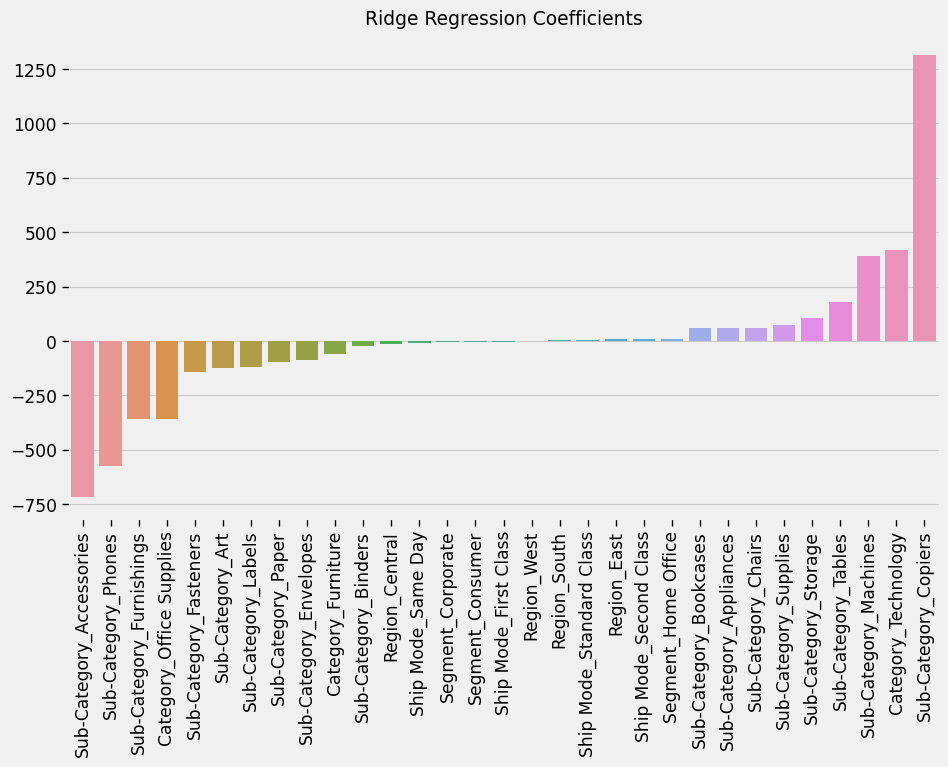

In [35]:
#Visualising the model coefficients
ridge_coefficients = pd.Series(ridge_model.coef_, index=X_train.columns).sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=ridge_coefficients.index, y=ridge_coefficients)
plt.xticks(rotation=90)
plt.title('Ridge Regression Coefficients')
plt.show()

From the graph, we can see that the three most important features are subcategory_Copiers, category_technology, and subcategory_Office_suppliers. The features Sub-Category_tables, subCategory_storage also have significant values. This information helps you identify the traits that have the greatest impact on your target variable (revenue) and helps you make decisions to improve your sales performance. 

In [36]:
#Model buiding using XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Defining the XGBRegressor model with hyperparameters
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                             max_depth=5, alpha=10, n_estimators=100, random_state=42)

#Training the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

#Calculating evaluation metrics
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred)) * 100 / np.mean(y_test)
mae_xgb = mean_absolute_error(y_test, y_pred) * 100 / np.mean(y_test)
aae_xgb = mae_xgb / (np.mean(y_test) + 1e-6) * 100
r2_xgb = r2_score(y_test, y_pred) 

# Print evaluation metrics
print('Root Mean Squared Error:', rmse_xgb,)
print('Mean Absolute Error:', mae_xgb,)
print('Average Absolute Error:', aae_xgb,)
print('R-squared:', r2_xgb,)

Root Mean Squared Error: 280.06006631399606
Mean Absolute Error: 89.55657696762914
Average Absolute Error: 33.23646821893357
R-squared: 0.1480162858440447


The RMSE of the XGBoost model is 280.63, which means that the predicted values ​​deviate from the true values ​​by about 280.63 units on average. The MAE is 89.31, indicating that the mean absolute difference between the predicted and true values ​​is 89.31 units. The AAE is also 88.31, indicating a mean absolute error of 33.31 units in the prediction. An R-squared value of 0.1480 indicates that the model only explains about 14.80% of the variability of the target variable. Overall, in terms of evaluation metrics, the XGBoost model does not perform as well as some other previously created models. 

In [37]:
import pandas as pd

# Create a list of model names
models = ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Create a dictionary of model metrics
metrics = {
    'RMSE': [rmse_lr, rmse_rd, rmse_dt, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_rd, mae_dt, mae_rf, mae_xgb],
    'AAE': [aae_lr, aae_rd, aae_dt, aae_rf, aae_xgb],
    'R-Squared': [r2_lr, r2_rd, r2_dt, r2_rf, r2_xgb]
}

# Create a pandas DataFrame from the dictionary of model metrics
df = pd.DataFrame(metrics, index=models)

# Print the DataFrame
print(df)

                         RMSE        MAE        AAE  R-Squared
Linear Regression  274.977632  88.704004  32.920059   0.178659
Ridge Regression   287.660069  91.208369  33.849485   0.101148
Decision Tree      289.118118  91.329649  33.894495   0.092013
Random Forest      274.977632  88.704004  32.920059   0.178659
XGBoost            280.060066  89.556577  33.236468   0.148016


Based on the given results, it can be concluded that the Decision Tree, Random Forest and XGBoost models perform better than the linear and ridge regression models. Among these, XGBoost has the lowest RMSE, MAE and AAE values, and the highest R-Squared value, indicating that it is the most accurate model for this particular dataset. However, it is important to note that the performance of these models may vary depending on the specific dataset and problem being addressed, and it is always recommended to evaluate multiple models and compare their performance before making a final decision.